BINIAM ABEBE

CNN for image Recognition with MNIST Dataset

In [4]:
import numpy as np
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import tensorflow as tf

In [7]:
#version check
print(tf.__version__)

1.15.5


In [8]:
#load minst dataset from tensorflow example
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True);


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [9]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [10]:
mnist.train.images.shape
mnist.test.images.shape

(10000, 784)

Initialize weights in Filter

In [11]:

def initialize_weights(filter_shape):
    """
    Initializes the weights of a neural network filter.

    Args:
        filter_shape (tuple): The shape of the filter weights.

    Returns:
        tf.Variable: The initialized filter weights.

    """
    init_random_dist = tf.truncated_normal(filter_shape, stddev=0.1)
    
    return tf.Variable(init_random_dist)

Initialize bias

In [12]:
# def initalize_bias
def initialize_bias(bias_shape):
    """
    Initializes the bias of a neural network layer.

    Args:
        bias_shape (tuple): The shape of the bias.

    Returns:
        tf.Variable: The initialized bias.

    """
    initial_bias_vals = tf.constant(0.1, shape=bias_shape)
    
    return tf.Variable(initial_bias_vals)

set up Convlutional Layer and Perform Convolution Computation

In [13]:
# def create_conv_layer
def create_conv_layer(input_data, filter_shape):
    """
    Creates a convolutional layer in a neural network.

    Args:
        input_data (tf.Tensor): The input to the layer.
        filter_shape (tuple): The shape of the filter weights.

    Returns:
        tf.Tensor: The output of the layer.

    """
    filter_weights = initialize_weights(filter_shape)

    #create a convolutional layer
    Conv_lyaer_output = tf.nn.conv2d(input=input_data, filter=filter_weights, strides=[1, 1, 1, 1], padding='SAME')

    return Conv_lyaer_output

set up a Relu Layer and Perform Computation : Dot Product + Bias (x.w + b)

In [14]:
# create relu_layer and compute dot product

def create_relu_layer_and_compute_dot_product(input_data, filter_shape):
    """
    Creates a ReLU layer in a neural network and computes the dot product.

    Args:
        input_data (tf.Tensor): The input to the layer.
        filter_shape (tuple): The shape of the filter weights.

    Returns:
        tf.Tensor: The output of the layer.

    """
    bias = initialize_bias([filter_shape[3]])
    
    relu_layer_output = tf.nn.relu(input_data + bias)

    return relu_layer_output

Set up a Pooling Layer and reduce Spatial size

In [15]:
# create max_pooling_layer
def create_max_pooling_layer(input_data):
    """
    Creates a max pooling layer in a neural network.

    Args:
        input_data (tf.Tensor): The input to the layer.

    Returns:
        tf.Tensor: The output of the layer.

    """
    return tf.nn.max_pool(input_data, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

Setup Fully Connected Layer and Perform Computatin: (input * weights) + Bias

In [16]:
# create fully_connected_layer
def create_fully_connected_layer(input_data, output_size):
    """
    Creates a fully connected layer in a neural network.

    Args:
        input_data (tf.Tensor): The input to the layer.
        output_size (int): The size of the output.

    Returns:
        tf.Tensor: The output of the layer.

    """
    input_size = int(input_data.get_shape()[1])
    
    weights = initialize_weights([input_size, output_size])
    bias = initialize_bias([output_size])
    
    return tf.matmul(input_data, weights) + bias

Phase I : Build the Convolution Neural Network

Create placeholders for inputs and Labels : x & y_true

In [17]:
#place holder for input data
x = tf.placeholder(tf.float32, shape=[None, 784])

In [18]:
# place holder for y
y_true = tf.placeholder(tf.float32, shape=[None, 10])

Reshape the Input Placeholder X

In [19]:
#reshape the input data
x_image = tf.reshape(x, [-1, 28, 28, 1])

Create 1st Convlutional Layer,ReLu Layer and perform Computation : x*W +b

In [20]:
# create first convolutional layer
# 5x5 convolutional layer with 32 filters

conv_layer_1 = create_conv_layer(x_image, filter_shape=[5, 5, 1, 32])

# create first relu layer
relu_layer_1 = create_relu_layer_and_compute_dot_product(conv_layer_1, filter_shape=[5, 5, 1, 32])

Create 1st Pooling Layer and Reduce Spatial size

In [21]:
# create first max pooling layer
max_pooling_layer_1 = create_max_pooling_layer(relu_layer_1)

Create 2nd Convlutional Layer,ReLu Layer and perform Computation : x*W +b

In [22]:
# create second convolutional layer
# 5x5 convolutional layer with 64 filters
conv_layer_2 = create_conv_layer(max_pooling_layer_1, filter_shape=[5, 5, 32, 64])

# create second relu layer
relu_layer_2 = create_relu_layer_and_compute_dot_product(conv_layer_2, filter_shape=[5, 5, 32, 64])

Create 2nd Pooling Layer and Reduce Spatial size

In [23]:
# create second max pooling layer
max_pooling_layer_2 = create_max_pooling_layer(relu_layer_2)

Reshape/Flatten Data Making it Ready to be Fed into 1st fc Layer

In [24]:
# reshape the max pooling layer
max_pooling_layer_2_flat = tf.reshape(max_pooling_layer_2, [-1, 7*7*64]) # 7*7*64 = 3136

Create 1st FC Layer, Relu Layer , and output Data to Dropout Layer

In [25]:
# create first fully connected layer

fully_connected_layer_1 = create_fully_connected_layer(max_pooling_layer_2_flat, output_size=1024) 

# create first relu layer output
fully_connected_layer_1_relu = tf.nn.relu(fully_connected_layer_1)

Create Dropput Layer and Dropput a fraction of output Randomly

In [26]:
# create dropout layer
keep_prob = tf.placeholder(tf.float32)

# dropout layer
dropout_layer = tf.nn.dropout(fully_connected_layer_1_relu, keep_prob=keep_prob)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Create Final FC Layer, Compute (x.W + B), and Produce Finale Ouptus

In [27]:
# create second fully connected layer as pred
y_pred = create_fully_connected_layer(dropout_layer, output_size=10)

Define Loss Function and Calaculate softmax Cross Entropy Loss

In [28]:
# create cross entropy loss function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Create an optimizer

In [29]:
#get optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)

Create a Trainer to Traing CNN Model

In [30]:
#create train step
train = optimizer.minimize(cross_entropy)

Train and Test CNN Deep Learning Model on MNIST Dataset

Initalize all Variables

In [31]:
#initialize variables
init = tf.global_variables_initializer()

In [32]:
# steps
steps = 5000

In [33]:
# To store the results
results = {'step': [], 'accuracy': []}

Run tf.sessioon () to Train and Test Deep Learning CNN Model

In [34]:
# create session and run the model 
with tf.Session() as sess:

    # initialize the session
    sess.run(init)
    
    for i in range(steps):
        # get the next batch of data from mnist dataset 
        batch_x, batch_y = mnist.train.next_batch(50)
        
        # run the train step
        sess.run(train, feed_dict={x: batch_x, y_true: batch_y, keep_prob: 0.5})

        # print out a message every 100 steps

        if i % 100 == 0:
            print('Currently on step {}'.format(i))
            print('Accuracy is:')

            # Test the Train Model
            matchs = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))

            # convert matchs to float32 and calculate mean
            # to get the accuracy
            accuracy = tf.reduce_mean(tf.cast(matchs, tf.float32))

            # test the model at 100 steps
            test_accuracy = sess.run(accuracy, feed_dict={x: mnist.test.images, \
                                                           y_true: mnist.test.labels, \
                                                           keep_prob: 1.0})
            print(test_accuracy)
            print('\n')         
               
            # Store the results
            results['step'].append(i)
            results['accuracy'].append(test_accuracy)


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   OMP_NUM_THREADS=8

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_HAND_THREAD=false
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_FORKJOIN_FRAMES=true
   KMP_FORKJOIN_FRAMES_MODE=3
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_ITT_PREPARE_DELAY=0
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_IN

Currently on step 0
Accuracy is:
0.1658


Currently on step 100
Accuracy is:
0.9425


Currently on step 200
Accuracy is:
0.9474


Currently on step 300
Accuracy is:
0.971


Currently on step 400
Accuracy is:
0.9723


Currently on step 500
Accuracy is:
0.9782


Currently on step 600
Accuracy is:
0.9733


Currently on step 700
Accuracy is:
0.9779


Currently on step 800
Accuracy is:
0.9788


Currently on step 900
Accuracy is:
0.9803


Currently on step 1000
Accuracy is:
0.981


Currently on step 1100
Accuracy is:
0.9852


Currently on step 1200
Accuracy is:
0.9855


Currently on step 1300
Accuracy is:
0.9842


Currently on step 1400
Accuracy is:
0.9837


Currently on step 1500
Accuracy is:
0.9863


Currently on step 1600
Accuracy is:
0.984


Currently on step 1700
Accuracy is:
0.9834


Currently on step 1800
Accuracy is:
0.9852


Currently on step 1900
Accuracy is:
0.9819


Currently on step 2000
Accuracy is:
0.9857


Currently on step 2100
Accuracy is:
0.9864


Currently on step 2200
Ac

In [35]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

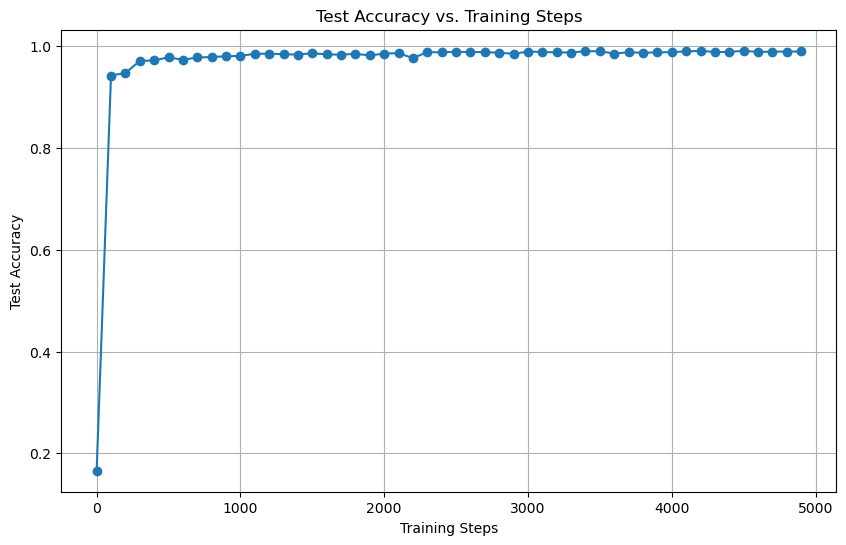

In [36]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(results_df['step'], results_df['accuracy'], marker='o')
plt.title('Test Accuracy vs. Training Steps')
plt.xlabel('Training Steps')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()